# Import Library

In [521]:
library("lattice")
library("igraph") 

# Import Data

In [53]:
Kensington <- readOGR("axial_map/DXF/Kensington.dxf")
Clerkenwell <- readOGR("axial_map/DXF/Clerkenwell.dxf")
Barnsbury <- readOGR("axial_map/DXF/Barnsbury.dxf")

OGR data source with driver: DXF 
Source: "axial_map/DXF/Kensington.dxf", layer: "entities"
with 2742 features
It has 6 fields


Warning message in readOGR("axial_map/DXF/Kensington.dxf"):
“Z-dimension discarded”

OGR data source with driver: DXF 
Source: "axial_map/DXF/Clerkenwell.dxf", layer: "entities"
with 3622 features
It has 6 fields


Warning message in readOGR("axial_map/DXF/Clerkenwell.dxf"):
“Z-dimension discarded”

OGR data source with driver: DXF 
Source: "axial_map/DXF/Barnsbury.dxf", layer: "entities"
with 1915 features
It has 6 fields


Warning message in readOGR("axial_map/DXF/Barnsbury.dxf"):
“Z-dimension discarded”

OGR data source with driver: DXF 
Source: "axial_map/DXF/Kensington_unlink.dxf", layer: "entities"
with 27 features
It has 6 fields
OGR data source with driver: DXF 
Source: "axial_map/DXF/Clerkenwell_unlink.dxf", layer: "entities"
with 60 features
It has 6 fields
OGR data source with driver: DXF 
Source: "axial_map/DXF/Barnsbury_unlink.dxf", layer: "entities"
with 2 features
It has 6 fields


In [56]:
Barnsbury_ped_pt <- readOGR("data/gate_map/DXF/Barnsbury_ped_pt.dxf")
Brompton_ped_pt <- readOGR("data/gate_map/DXF/Brompton_ped_pt.dxf")
Calthorpe_ped_pt <- readOGR("data/gate_map/DXF/Calthorpe_ped_pt.dxf")
SKMuseum_ped_pt <- readOGR("data/gate_map/DXF/SKMuseum_ped_pt.dxf")

OGR data source with driver: DXF 
Source: "data/gate_map/DXF/Barnsbury_ped_pt.dxf", layer: "entities"
with 109 features
It has 6 fields
OGR data source with driver: DXF 
Source: "data/gate_map/DXF/Brompton_ped_pt.dxf", layer: "entities"
with 87 features
It has 6 fields
OGR data source with driver: DXF 
Source: "data/gate_map/DXF/Calthorpe_ped_pt.dxf", layer: "entities"
with 56 features
It has 6 fields
OGR data source with driver: DXF 
Source: "data/gate_map/DXF/SKMuseum_ped_pt.dxf", layer: "entities"
with 69 features
It has 6 fields


In [57]:
England <- readOGR("england_lad_2011Polygon.shx")

ERROR: Error in ogrListLayers(dsn = dsn): Cannot open data source


# Visualize axial map and gate point

In [572]:
png(filename="image/Barnsbury.png")
par(bg = "black")
plot(Barnsbury, col = "green", bg = "black")
plot(Barnsbury_ped_pt, col = "yellow", bg = "black", add = T)
dev.off()

pdf 
  2

In [573]:
png(filename="image/Clerkenwell.png")
par(bg = "black")
plot(Clerkenwell, col = "blue", bg = "black")
plot(Calthorpe_ped_pt, col = "yellow", bg = "black", add = T)
dev.off()

pdf 
  2

In [574]:
png(filename="image/Kensington.png")
par(bg = "black")
plot(Kensington, col = "red", bg = "black")
plot(Brompton_ped_pt, col = "yellow", bg = "black", add = T)
dev.off()

pdf 
  2

In [576]:
png(filename="image/Kensington2.JPG")
par(bg = "black")
plot(Kensington, col = "white", bg = "black")
plot(SKMuseum_ped_pt, col = "yellow", bg = "black", add = T)
dev.off()

pdf 
  2

# Connectivity / Local / Glocal


In [223]:
data_ped <- read.csv("data/Table/SATC_London4_ped.csv")

Barnsbury_ped <- data_ped[data_ped$Area_Name=='Barnsbury',]
Barnsbury_gate <- unique(Barnsbury_ped["LineID"])
Barnsbury_gate <- as.numeric(unlist(Barnsbury_gate))

Brompton_ped <- data_ped[data_ped$Area_Name=='Brompton',]
Brompton_gate <- c(unique(Brompton_ped["LineID"]))
Brompton_gate <- as.numeric(unlist(Brompton_gate))

Calthorpe_ped <- data_ped[data_ped$Area_Name=='Calthorpe',]
Calthorpe_gate <- c(unique(Calthorpe_ped["LineID"]))
Calthorpe_gate <- as.numeric(unlist(Calthorpe_gate))

SKMuseum_ped <- data_ped[data_ped$Area_Name=='SKMuseum',]
SKMuseum_gate <- c(unique(SKMuseum_ped["LineID"]))
SKMuseum_gate <- as.numeric(unlist(SKMuseum_gate))

In [324]:
Barnsbury_ax <- read.csv("axial_map/csv/Barnsbury.csv")
Clerkenwell_ax <- read.csv("axial_map/csv/Clerkenwell.csv")
Kensington_ax <- read.csv("axial_map/csv/Kensington.csv")

In [347]:
Barnsbury_ax_gate <- Barnsbury_ax[Barnsbury_ax$ID %in% Barnsbury_gate, ]
Clerkenwell_ax_gate <- Clerkenwell_ax[Clerkenwell_ax$ID %in% Calthorpe_gate, ]
Kensington_ax_gate <- Kensington_ax[Kensington_ax$ID %in% SKMuseum_gate,]
Kensington_ax_gate2 <- Kensington_ax[Kensington_ax$ID %in% Brompton_gate,]

# The roads cross each other?

In [420]:
#AB and CD cross?
#True means cross, False means no
road_cross <- function(ax, ay, bx, by, cx, cy, dx, dy) {
    ta <- (cx - dx) * (ay - cy) + (cy - dy) * (cx - ax)
    ta <- as.double(ta)
    tb <- (cx - dx) * (by - cy) + (cy - dy) * (cx - bx)
    tb <- as.double(tb)
    tc <- (ax - bx) * (cy - ay) + (ay - by) * (ax - cx)
    tc <- as.double(tc)
    td <- (ax - bx) * (dy - ay) + (ay - by) * (ax - dx)
    td <- as.double(td)
    value <- tc * td < 0 && ta * tb < 0
    return (value)
}

In [526]:
road_cross_matrix <- function(gate, ax_gate){

    nrowcol <- length(gate)
    cor <- matrix(nrow=nrowcol, ncol=nrowcol, dimnames = list(gate, gate))
    cor[] <- 0

    for (i in 1:nrow(ax_gate)){
        AX <- ax_gate[i,2]
        AY <- ax_gate[i,3]
        BX <- ax_gate[i,4]
        BY <- ax_gate[i,5]

        for (j in 1:nrow(ax_gate)){
            CX <- ax_gate[j,2]
            CY <- ax_gate[j,3]
            DX <- ax_gate[j,4]
            DY <- ax_gate[j,5]
            hoge <- c(i,j)
            cross <- road_cross(AX, AY, BX, BY, CX, CY, DX, DY)

            if (cross == TRUE){
            cor[i,j] <- 1
            }
        }
    }
    
    return(cor)
}

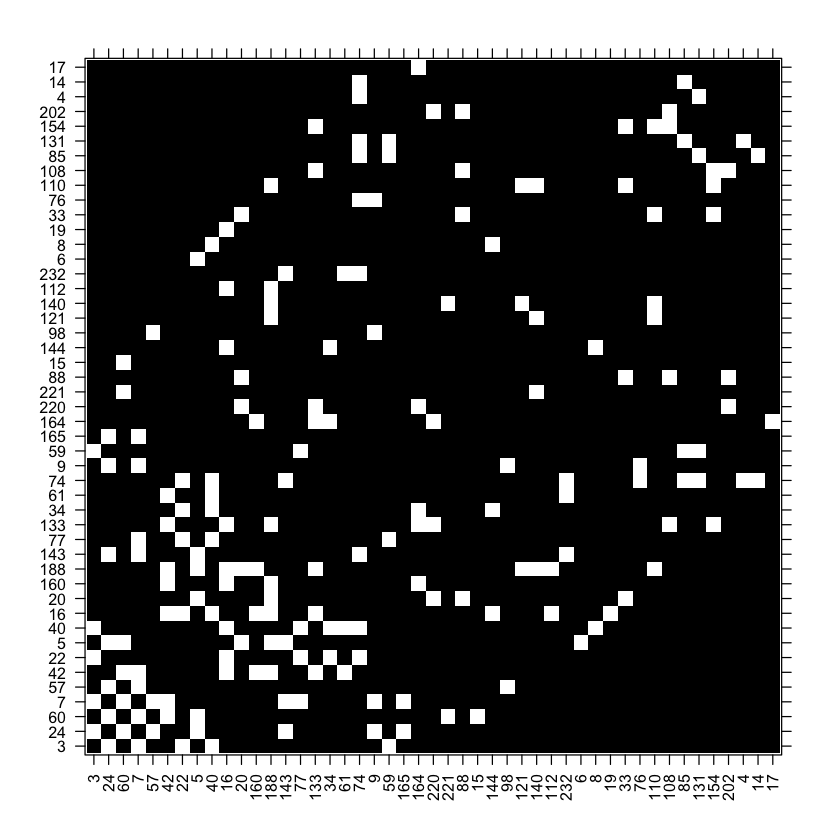

In [529]:
cor_barnsbury = road_cross_matrix(Barnsbury_gate, Barnsbury_ax_gate)
rgb.palette <- colorRampPalette(c("black", "white"), space = "rgb")
levelplot(cor_barnsbury, scales=list(x=list(rot=90)), colorkey = FALSE, xlab="", ylab="", col.regions=rgb.palette(120))

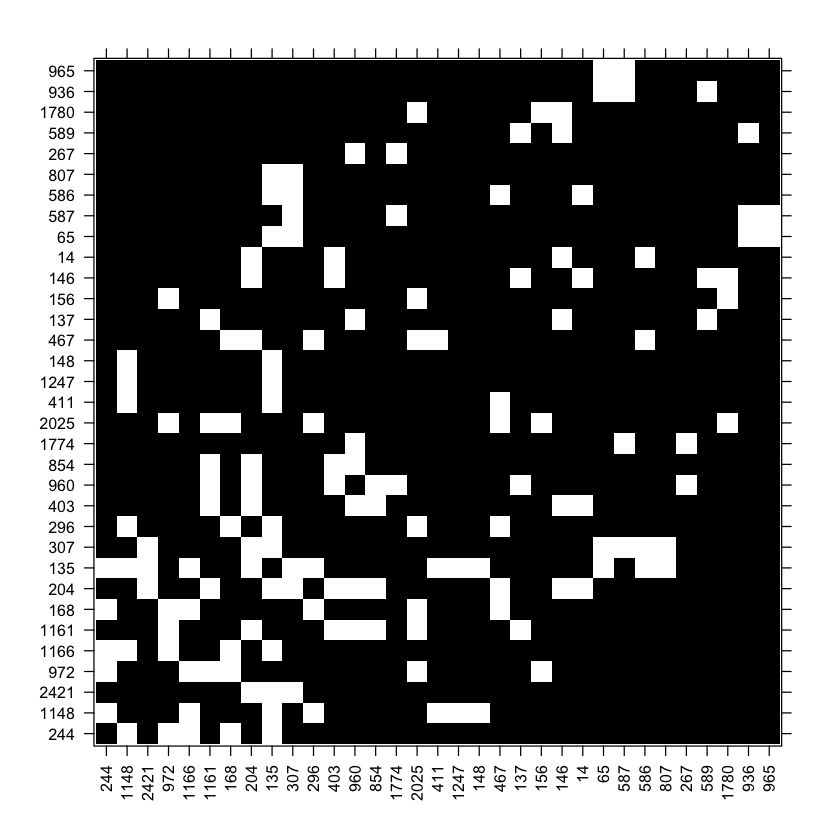

In [530]:
cor_calthorpe <- road_cross_matrix(Calthorpe_gate, Clerkenwell_ax_gate)
rgb.palette <- colorRampPalette(c("black", "white"), space = "rgb")
levelplot(cor_calthorpe, scales=list(x=list(rot=90)), colorkey = FALSE, xlab="", ylab="", col.regions=rgb.palette(120))

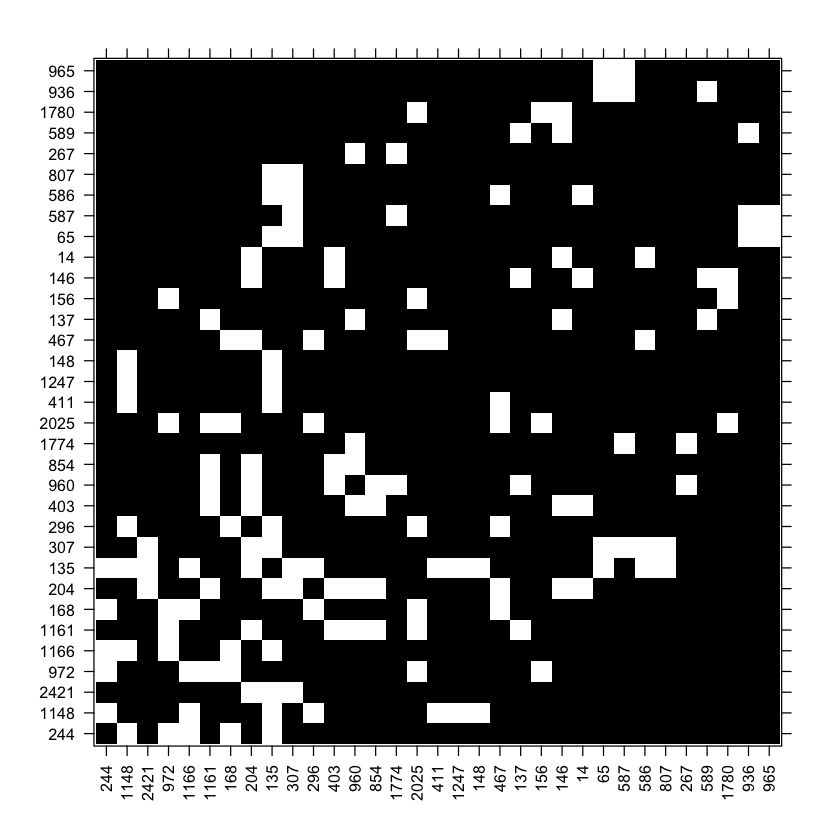

In [531]:
cor_SKMuseum <- road_cross_matrix(SKMuseum_gate, Kensington_ax_gate)
rgb.palette <- colorRampPalette(c("black", "white"), space = "rgb")
levelplot(cor_calthorpe, scales=list(x=list(rot=90)), colorkey = FALSE, xlab="", ylab="", col.regions=rgb.palette(120))

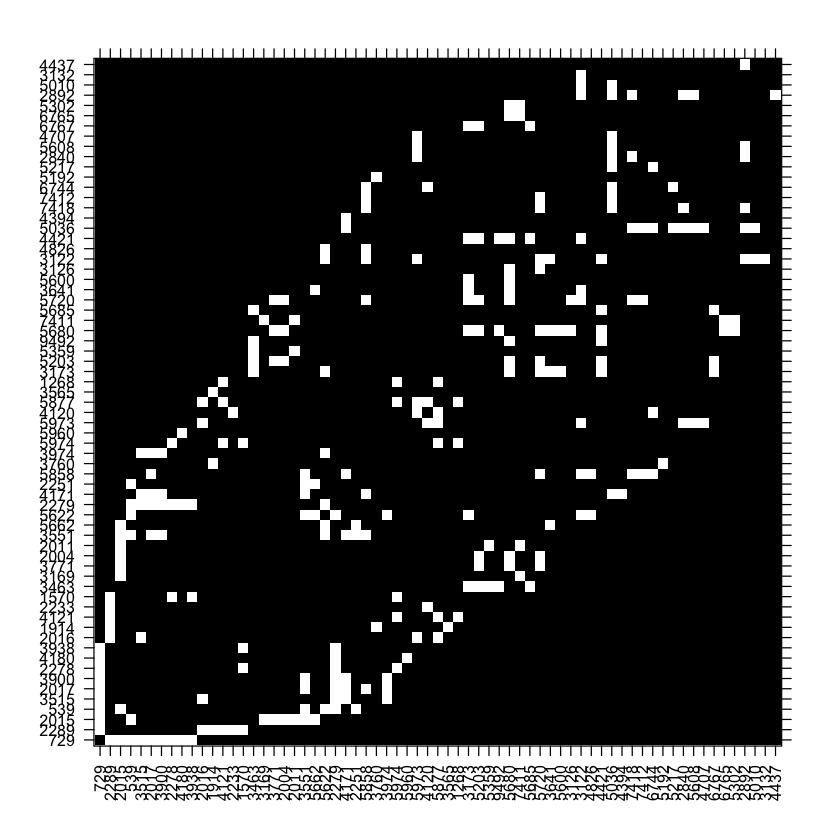

In [532]:
cor_brompton <- road_cross_matrix(Brompton_gate, Kensington_ax_gate2)
rgb.palette <- colorRampPalette(c("black", "white"), space = "rgb")
levelplot(cor_brompton, scales=list(x=list(rot=90)), colorkey = FALSE, xlab="", ylab="", col.regions=rgb.palette(120))

# Igraph

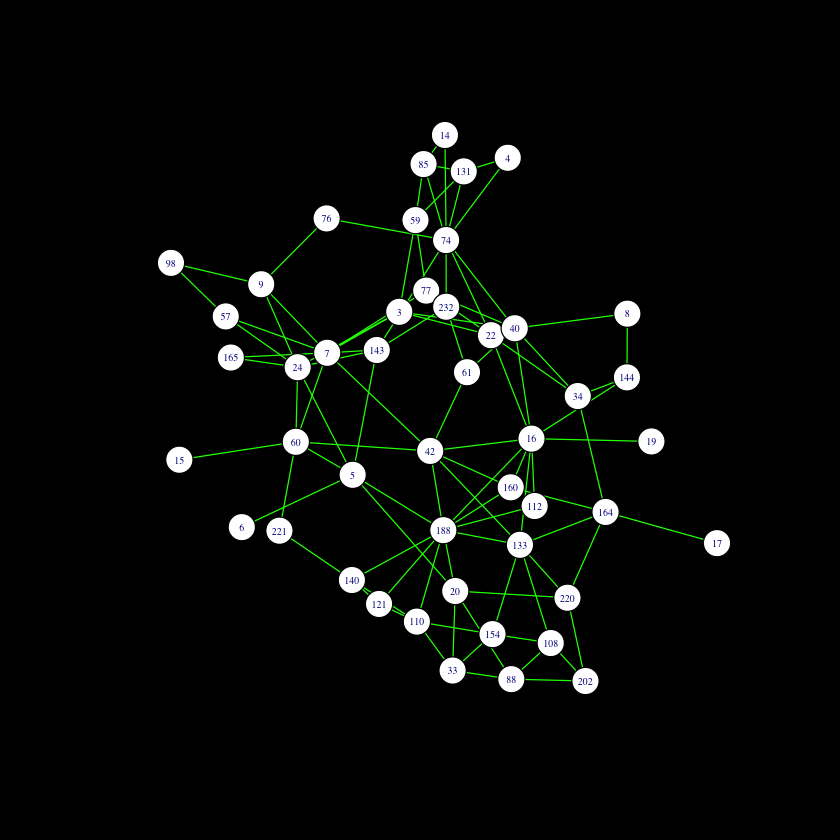

In [557]:
graph_barnsbury <- graph_from_adjacency_matrix(cor_barnsbury)
graph_barnsbury <- as.undirected(graph_barnsbury)
par(bg = "black")
plot(graph_barnsbury,vertex.size=10, vertex.color="white", edge.color="green",vertex.label.cex=0.5)

In [566]:
getwd()

[1] "/Users/soma/Desktop/CLASS/GIS/FINAL_COURSEWORK/SS_ver"

In [577]:
graph_calthorpe <- graph_from_adjacency_matrix(cor_calthorpe)
graph_calthorpe <- as.undirected(graph_calthorpe)

png(filename="image/igraph.png")
par(bg = "black")
plot(graph_calthorpe,vertex.size=10, vertex.label=NA, vertex.color="white", edge.color="green", vertex.label.color="black",vertex.label.cex=0.5)
dev.off()

pdf 
  2

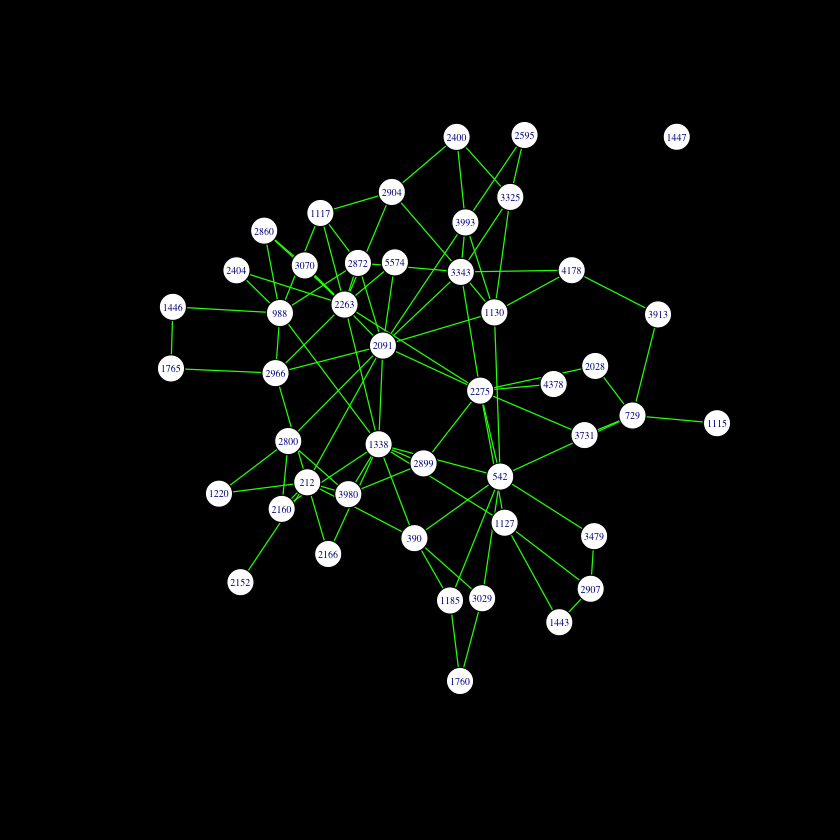

In [558]:
graph_SKMuseum <- graph_from_adjacency_matrix(cor_SKMuseum)
graph_SKMuseum<- as.undirected(graph_SKMuseum)
par(bg = "black")
plot(graph_SKMuseum,vertex.size=10, vertex.color="white", edge.color="green",vertex.label.cex=0.5)

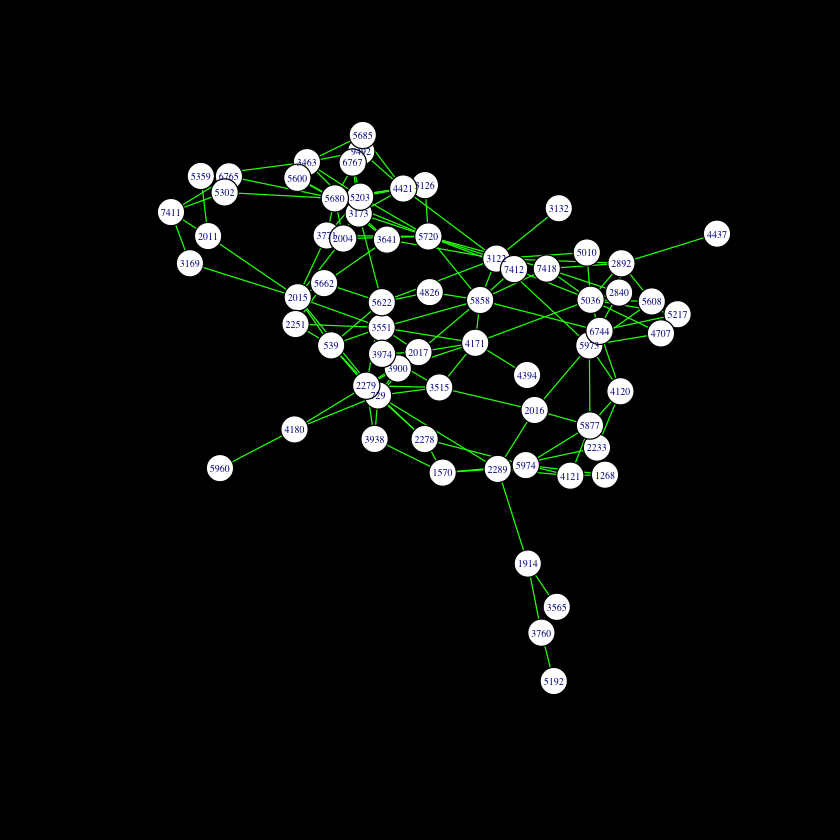

In [559]:
graph_brompton <- graph_from_adjacency_matrix(cor_brompton)
graph_brompton <- as.undirected(graph_brompton)
par(bg = "black")
plot(graph_brompton,vertex.size=10, vertex.color="white", edge.color="green",vertex.label.cex=0.5)